# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table.

   student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

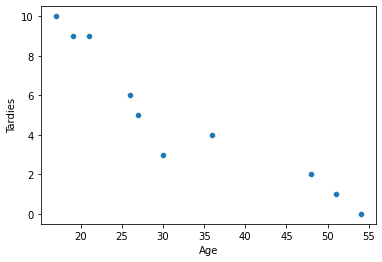

In [9]:
# Your code here.
sns.scatterplot(data = student_data, x='Age', y='Tardies')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [10]:
# Your response here. 
# We can observe a negative correlation between these 2 variables: the younger the person is, the more times he/she
# arrives late to class

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [11]:
# Your response here.
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [13]:
# Covariance measures the direction of the relationship between two variables. A positive covariance means that both 
# variables tend to be high or low at the same time. A negative covariance means that when one variable is high, the 
# other tends to be low.

In [12]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [14]:
# Covariance and correlation are related to each other, in the sense that covariance indicates the direction of the 
# linear relationship between variables. Correlation on the other hand measures both the strength and direction of 
# the linear relationship between two variables.

In [15]:
# In our case we see negative covariance meaning that when the 'Age' variable is lower than it's average, the 'Tardies'
# variable is going to be higher than it's average. The correlation coefficient equal to -0.93 indicates that there is
# a high negative correlation between these two variables.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [17]:
# Your response here.
model = LinearRegression()

X = student_data[['Age']]
y = student_data[['Tardies']]

model.fit(X, y)

model.score(X, y)

0.8820265558250109

Plot your regression model on your scatter plot.

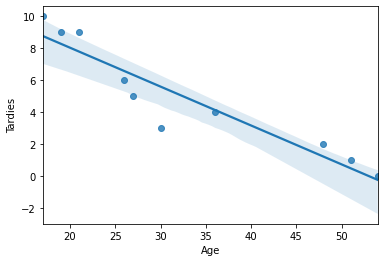

In [19]:
# Your code here.
sns.regplot(data=student_data, x='Age', y='Tardies')

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [20]:
# Your response here. 
# We observe a negative correlation between 'Age' and 'Tardies'. The R2 = 0.882, meaning 88.2% in the 'Tardies' 
# variable can be explained by the 'Age' variable in the model.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [22]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('./vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [23]:
# Your response here. 
df = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
df.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


<AxesSubplot:>

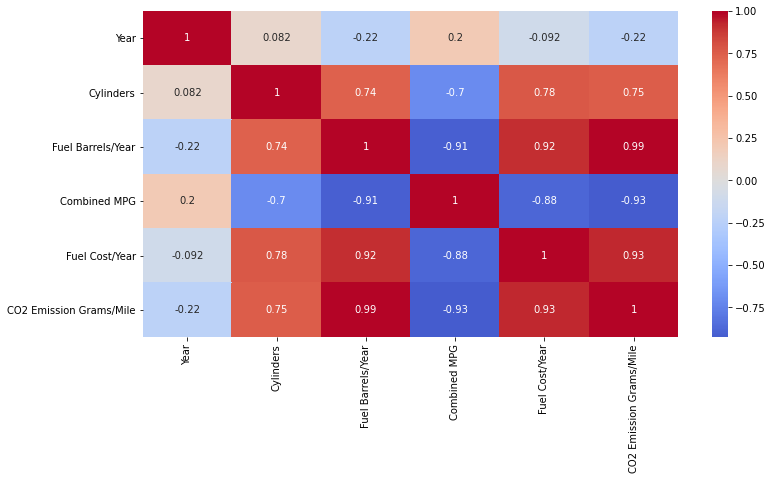

In [24]:
plt.rcParams["figure.figsize"] = (12,6)
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',center = 0)

In [25]:
# It seems that the most important variable in determining CO2 emissions is 'Fuel Barrels/Year'. Variables 
# 'Fuel Cost/Year' and 'Cylinders' have a strong positive correlation, while 'Combined MPG' has a strong negative 
# correlation with 'CO2 Emission Grams/Mile' as well. Variable 'Year' provides the least amount of helpful information
# for determining CO2 emissions.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# Your response here. 
X = df[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']] 

y = df['CO2 Emission Grams/Mile']

model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

model.fit(X_train, y_train)

model.score(X_train,y_train)

0.9808581202936333

In [28]:
y_pred = model.predict(X)

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [32]:
model.coef_

array([-0.32015495,  1.75611114, 19.13819202, -2.98370307,  0.03265782])

In [33]:
#'Fuel Barrels/Year' is the most important variable when determining CO2 emissions

In [34]:
r2_score(y,y_pred)

0.9808700156843311

In [35]:
# Meaning 98% of 'CO2 Emission Grams/Mile' could be explained with these 5 independent variables. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [36]:
# Your code here. 
party = pd.DataFrame({'Invited': [1,3,4,6,8,9,11,14], 'Attended': [1,2,4,4,5,7,8,13]})
party

,Invited,Attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<AxesSubplot:xlabel='Invited', ylabel='Attended'>

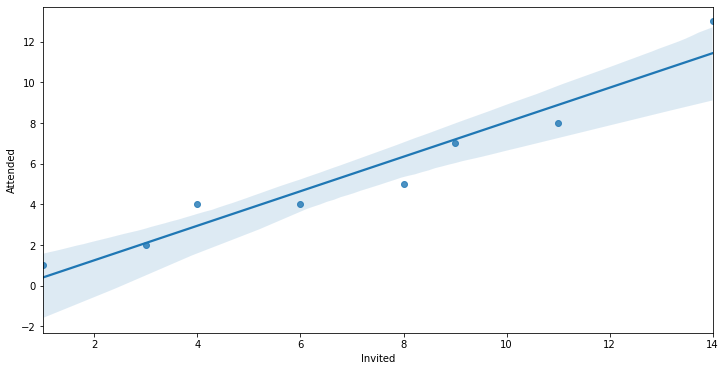

In [37]:
# Your code here.
sns.regplot(data=party, x='Invited', y='Attended')

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [38]:
# Your response here. 
# It looks like there is a positive correlation between the variables 'Invited' and 'Attended'

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

<AxesSubplot:>

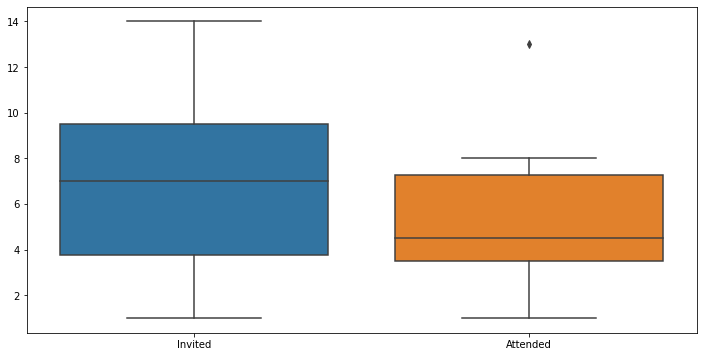

In [39]:
# Your response here. 
sns.boxplot(data=party)

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 